In [1]:







import pathlib
import numpy as np
import PIL

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

pot = pathlib.Path("Nature/data")
st_slik = len(list(pot.glob('*/*.jpg')))
print("Število vseh slik: " + str(st_slik))

Število vseh slik: 3404


<Axes: xlabel='Category', ylabel='Number of Images'>

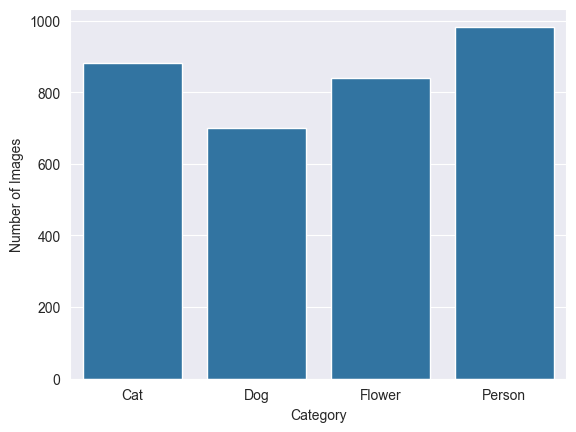

In [2]:
import seaborn as sns
import pandas as pd

data = {
    'Category': ['Cat', 'Dog', 'Flower', 'Person'],
    'Number of Images': [
        len(list(pot.glob("cat/*.jpg"))), 
        len(list(pot.glob("dog/*.jpg"))), 
        len(list(pot.glob("flower/*.jpg"))), 
        len(list(pot.glob("person/*.jpg")))]
}
df = pd.DataFrame(data)

sns.barplot(data=data, y="Number of Images", x="Category")

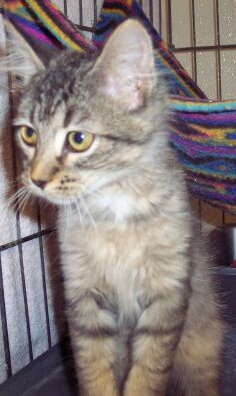

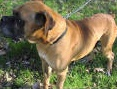

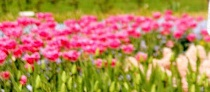

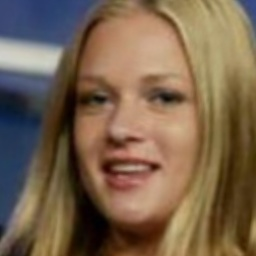

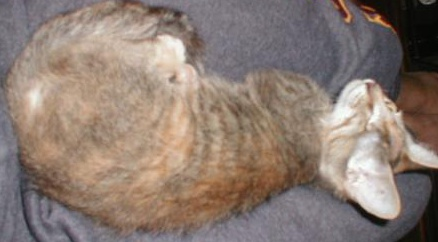

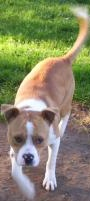

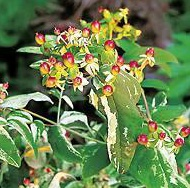

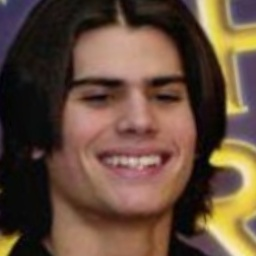

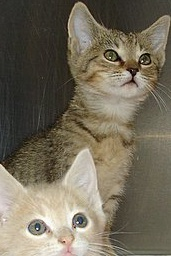

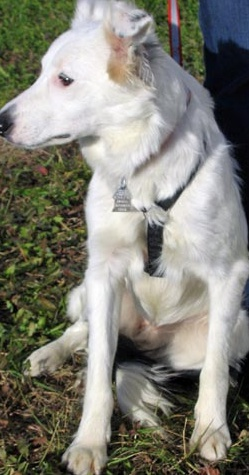

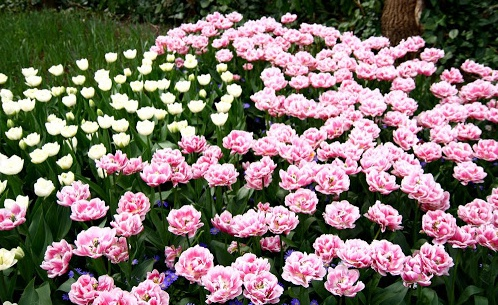

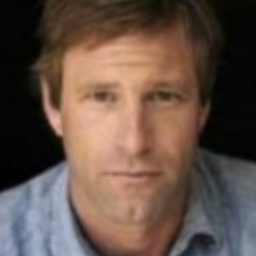

In [3]:
macke = list(pot.glob("cat/*"))
psi = list(pot.glob("dog/*"))
roze = list(pot.glob("flower/*"))
osebe = list(pot.glob("person/*"))

for i in range(3):
    display(PIL.Image.open(str(macke[i])))
    display(PIL.Image.open(str(psi[i])))
    display(PIL.Image.open(str(roze[i])))
    display(PIL.Image.open(str(osebe[i])))
    i=i+1

In [4]:
img_height = 120
img_width = 120

batch_size = 25

In [5]:
train = tf.keras.preprocessing.image_dataset_from_directory(
    pot,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 3404 files belonging to 4 classes.
Using 2724 files for training.


In [6]:
validation = tf.keras.preprocessing.image_dataset_from_directory(
    pot,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 3404 files belonging to 4 classes.
Using 680 files for validation.


In [7]:
imena_razredov = train.class_names
print(imena_razredov)

['cat', 'dog', 'flower', 'person']


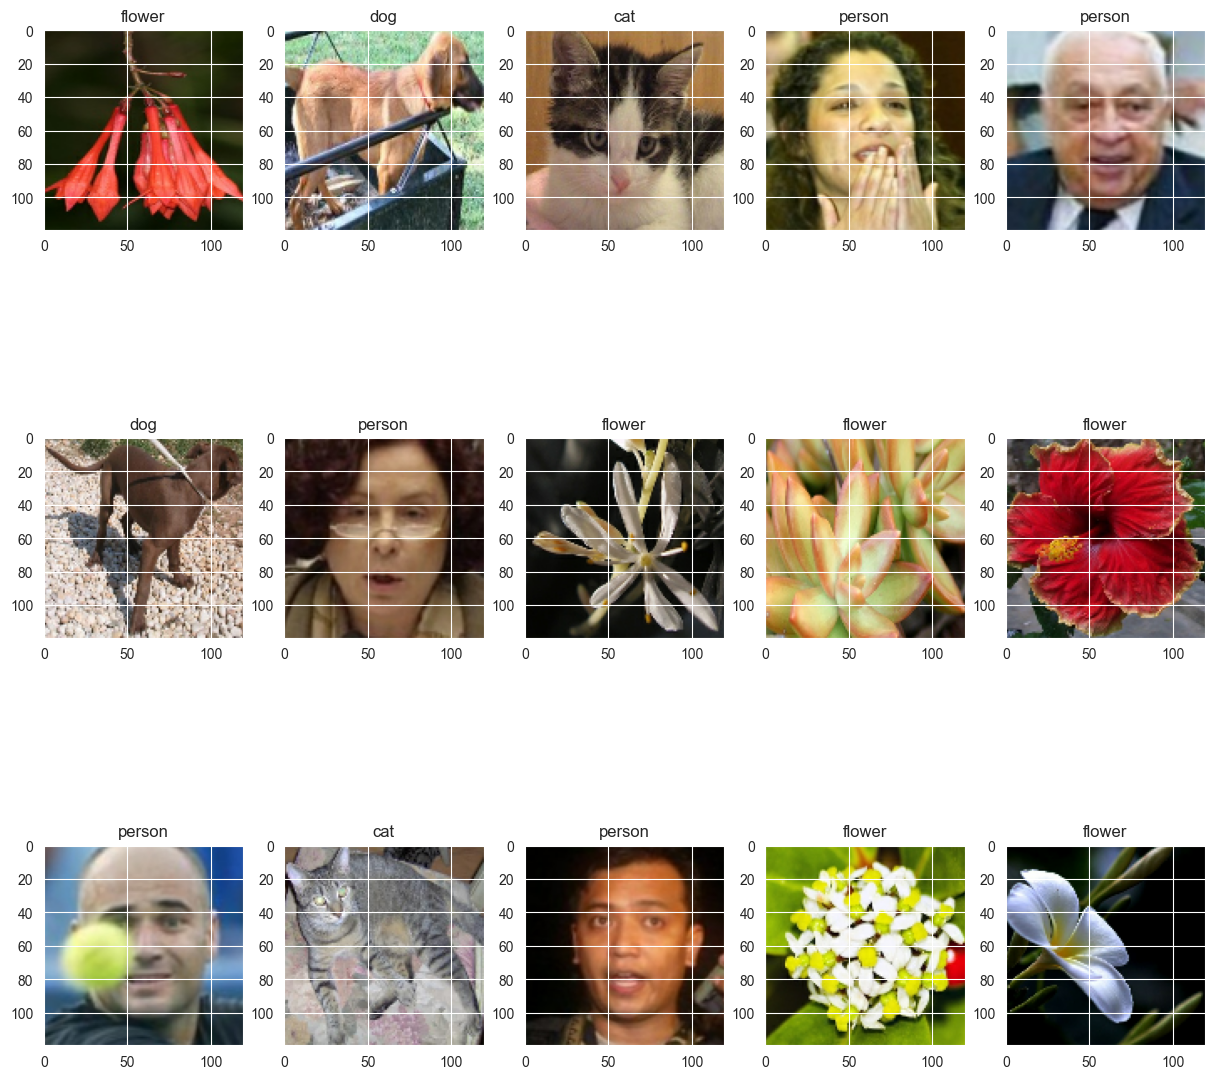

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 15))
for images, labels in train.take(1):
    for i in range(15):
        ax = plt.subplot(3, 5, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(imena_razredov[labels[i]])

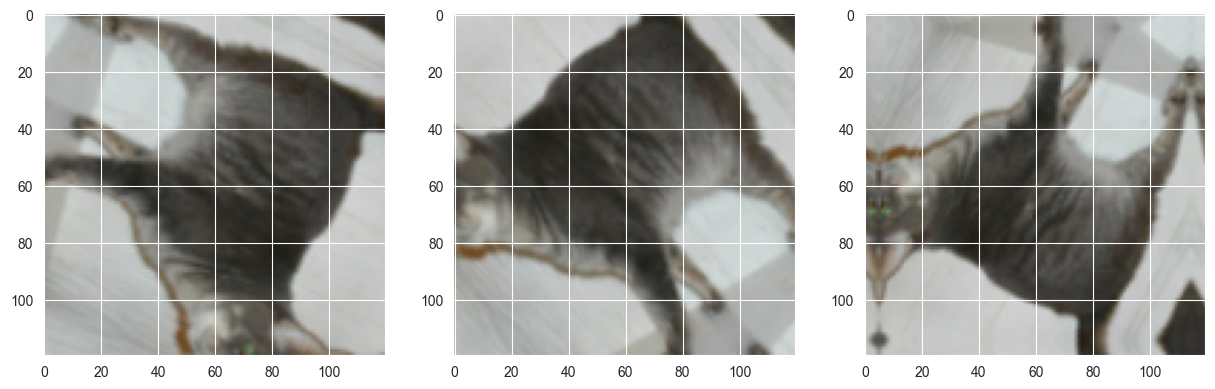

In [9]:
data_augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("vertical",input_shape=(img_height, img_width,3)),
    layers.experimental.preprocessing.RandomRotation(0.3),
    layers.experimental.preprocessing.RandomZoom(0.3),
])

plt.figure(figsize=(15, 15))
for images, _ in train.take(1):
    for i in range(3):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(1, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))

In [10]:
from tensorflow.keras.models import Sequential

st_razredov = 4

model = Sequential()

model.add(layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3))) #standardizacija podatkov

model.add(layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(st_razredov))

In [11]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 120, 120, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 120, 120, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 60, 60, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 30, 30, 64)       

In [13]:
epochs=20
rezultati = model.fit(train, validation_data=validation, epochs=epochs)

Epoch 1/20
109/109 [==============================] - 12s 101ms/step - loss: 0.7595 - accuracy: 0.6777 - val_loss: 0.4919 - val_accuracy: 0.7676
Epoch 2/20
109/109 [==============================] - 10s 93ms/step - loss: 0.4281 - accuracy: 0.8113 - val_loss: 0.3919 - val_accuracy: 0.8353
Epoch 3/20
109/109 [==============================] - 10s 94ms/step - loss: 0.3132 - accuracy: 0.8741 - val_loss: 0.3968 - val_accuracy: 0.8485
Epoch 4/20
109/109 [==============================] - 10s 94ms/step - loss: 0.2264 - accuracy: 0.9211 - val_loss: 0.3270 - val_accuracy: 0.8691
Epoch 5/20
109/109 [==============================] - 10s 93ms/step - loss: 0.1471 - accuracy: 0.9446 - val_loss: 0.3178 - val_accuracy: 0.8750
Epoch 6/20
109/109 [==============================] - 10s 94ms/step - loss: 0.0942 - accuracy: 0.9692 - val_loss: 0.3391 - val_accuracy: 0.8721
Epoch 7/20
109/109 [==============================] - 10s 92ms/step - loss: 0.0671 - accuracy: 0.9838 - val_loss: 0.3850 - val_accuracy

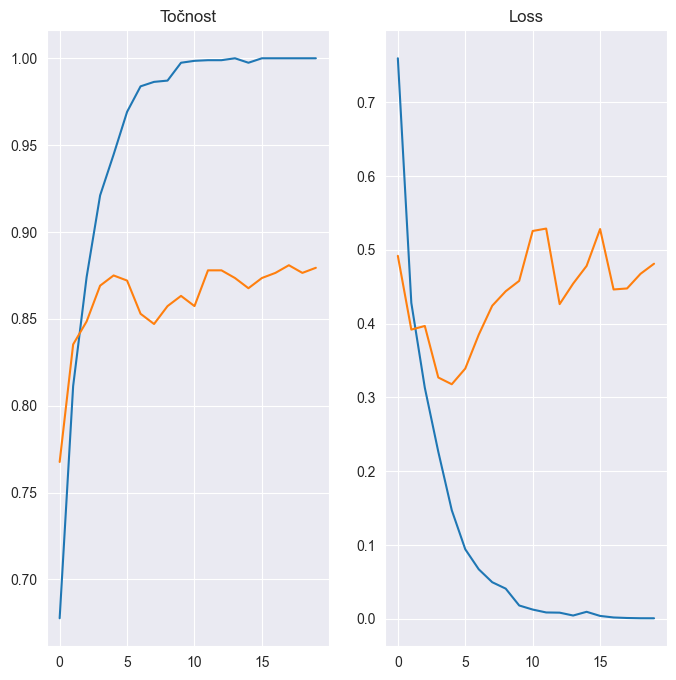

In [14]:
tocnost_train = rezultati.history['accuracy']
tocnost_val = rezultati.history['val_accuracy']

loss_train = rezultati.history['loss']
loss_val= rezultati.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, tocnost_train, label='Učna množica')
plt.plot(epochs_range, tocnost_val, label='Validacijska množica')
plt.title('Točnost')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss_train, label='Učna množica')
plt.plot(epochs_range, loss_val, label='Validacijska množica')
plt.title('Loss')
plt.show()

1/1 [==============================] - 0s 114ms/step
cat, napovedano s 99.99783039093018 % točnostjo


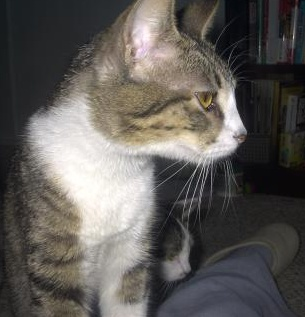

1/1 [==============================] - 0s 25ms/step
cat, napovedano s 100.0 % točnostjo


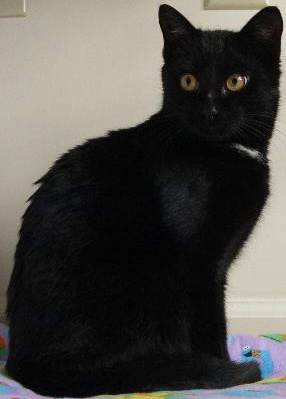

1/1 [==============================] - 0s 24ms/step
cat, napovedano s 99.69598054885864 % točnostjo


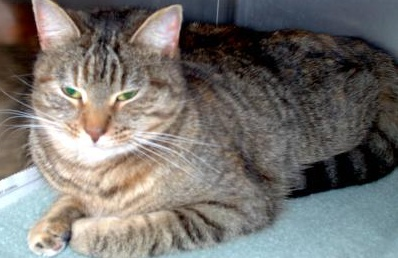

1/1 [==============================] - 0s 27ms/step
dog, napovedano s 99.99880790710449 % točnostjo


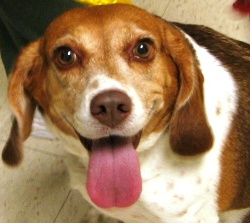

1/1 [==============================] - 0s 21ms/step
dog, napovedano s 99.99933242797852 % točnostjo


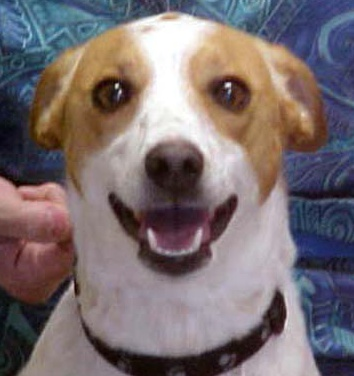

1/1 [==============================] - 0s 24ms/step
dog, napovedano s 100.0 % točnostjo


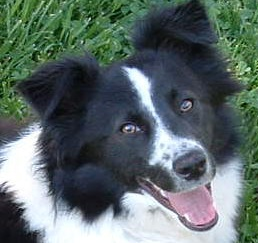

1/1 [==============================] - 0s 33ms/step
flower, napovedano s 100.0 % točnostjo


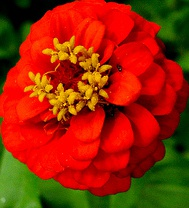

1/1 [==============================] - 0s 30ms/step
flower, napovedano s 100.0 % točnostjo


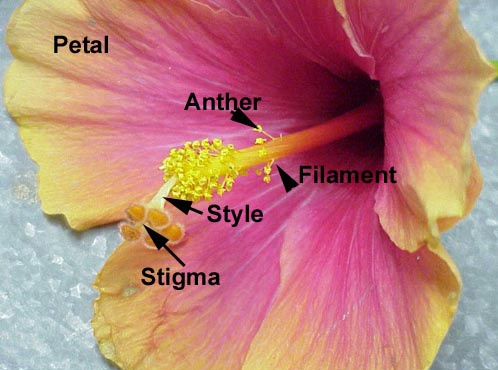

1/1 [==============================] - 0s 22ms/step
flower, napovedano s 100.0 % točnostjo


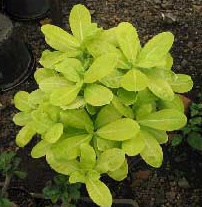

1/1 [==============================] - 0s 31ms/step
person, napovedano s 99.99990463256836 % točnostjo


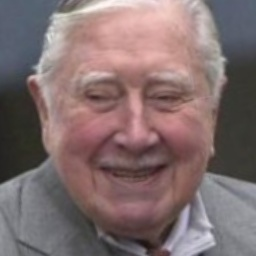

1/1 [==============================] - 0s 26ms/step
person, napovedano s 100.0 % točnostjo


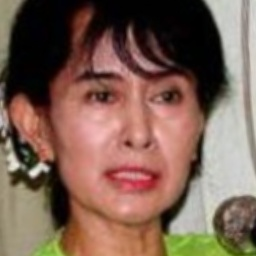

1/1 [==============================] - 0s 35ms/step
person, napovedano s 100.0 % točnostjo


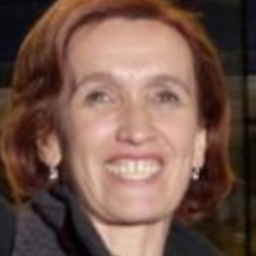

1/1 [==============================] - 0s 30ms/step
cat, napovedano s 99.95238780975342 % točnostjo


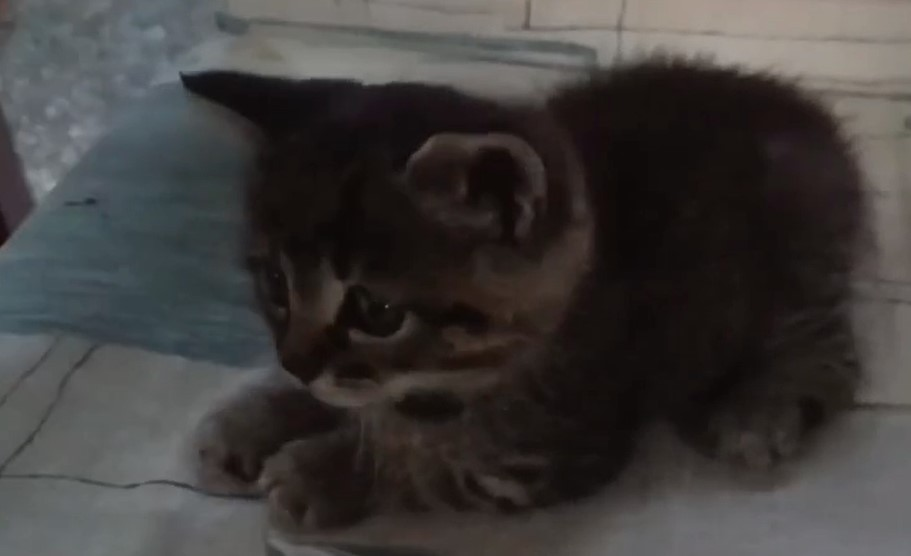

In [15]:
for i in range(1,14):
    img = keras.preprocessing.image.load_img("Nature/test/"+str(i)+".jpg", target_size=(img_height, img_width))
    img_array = keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)

    napovedi = model.predict(img_array)
    tocnost = tf.nn.softmax(napovedi[0])

    print(imena_razredov[np.argmax(tocnost)] + ", napovedano s " + str(100 * np.max(tocnost)) + " % točnostjo")
    display(PIL.Image.open(str("Nature/test/"+str(i)+".jpg")))
    i=i+1